## PACKAGES

In [12]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## ARICA

In [45]:
## Load data for a given city
city = 'Arica'
fileAric = list(Path(f'./{city}').glob('*.npz'))
totalsim = 0
hDict    = dict()

for file in fileAric:
    data   = np.load(file)
    hmax   = data['hmax_map']
    bathy  = data['dem']
    hDict[file.name] = hmax
    extent = data['extent']
    totalsim += hmax.shape[0]
    print(f'Simulations: {hmax.shape[0]}, dimensions: {hmax.shape[1:]}')
print(f'Total Simulations: {totalsim}')

Simulations: 489, dimensions: (864, 648)
Simulations: 512, dimensions: (864, 648)
Simulations: 515, dimensions: (864, 648)
Simulations: 491, dimensions: (864, 648)
Simulations: 504, dimensions: (864, 648)
Simulations: 524, dimensions: (864, 648)
Total Simulations: 3035


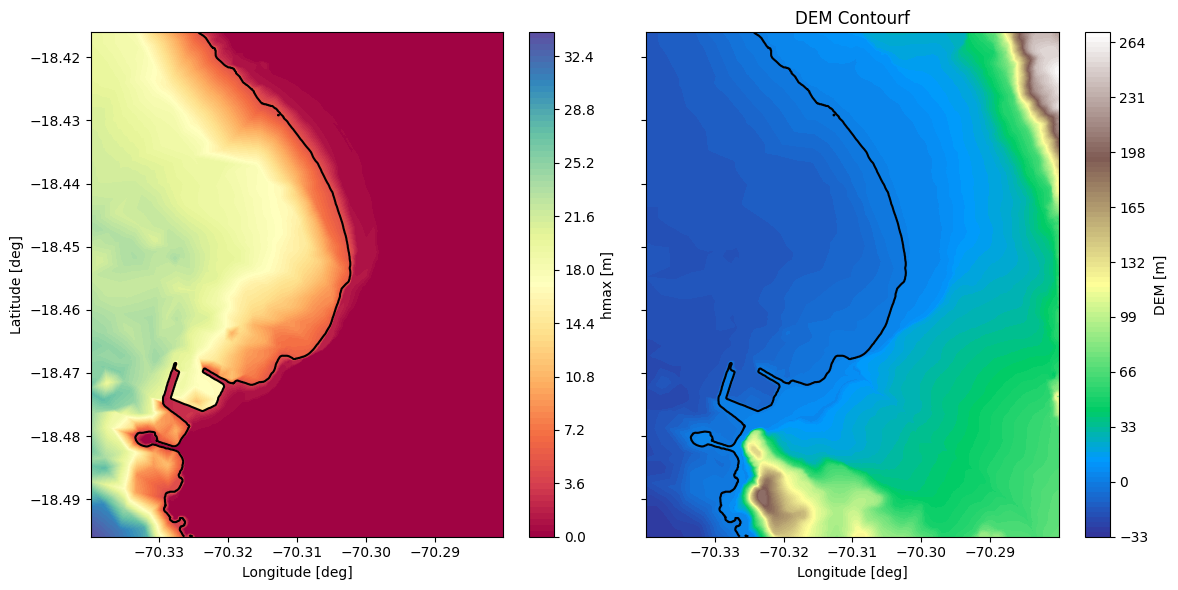

In [46]:
# Extract bounds
min_lon, max_lon, min_lat, max_lat = extent

grid_x, grid_y = hmax[0, :, :].shape
# Create the mesh grid for longitude and latitude
lon = np.linspace(min_lon, max_lon, grid_y)  # Longitude axis
lat = np.linspace(min_lat, max_lat, grid_x)  # Latitude axis
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot 1: hmax with z=0 contour
contour1 = axes[0].contourf(
    lon_mesh, lat_mesh, np.flipud(hmax[0, :, :]),  # Flip the data vertically
    cmap='Spectral',  # Colormap
    levels=100        # Number of contour levels
)
axes[0].contour(
    lon_mesh, lat_mesh, np.flipud(bathy),  # Flip DEM vertically to match orientation
    levels=[0],  # Contour at z=0
    colors='black',  # Color of the contour line
    linewidths=1.5   # Thickness of the contour line
)
cbar1 = fig.colorbar(contour1, ax=axes[0])
cbar1.set_label('hmax [m]')
axes[0].set_xlabel('Longitude [deg]')
axes[0].set_ylabel('Latitude [deg]')

# Plot 2: DEM as contourf
contour2 = axes[1].contourf(
    lon_mesh, lat_mesh, np.flipud(bathy),  # Flip DEM vertically
    cmap='terrain',  # Colormap for elevation
    levels=100        # Number of contour levels
)
axes[1].contour(
    lon_mesh, lat_mesh, np.flipud(bathy),  # Flip DEM vertically to match orientation
    levels=[0],  # Contour at z=0
    colors='black',  # Color of the contour line
    linewidths=1.5   # Thickness of the contour line
)
cbar2 = fig.colorbar(contour2, ax=axes[1])
cbar2.set_label('DEM [m]')
axes[1].set_title('DEM Contourf')
axes[1].set_xlabel('Longitude [deg]')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### CREATE DATASET

In [47]:
ds = xr.Dataset(
    {
        "bathy": (["lat", "lon"], bathy.astype("float32")),  # Bathy
    },
    coords={
        "lat": (["lat"], lat),  # Lat coordinate
        "lon": (["lon"], lon),  # Lon coordinate
    },
)
ds.to_netcdf(f'./{city}/bathymetry.nc')

In [48]:
for key, hmax_tensor in hDict.items():
    key = key.split('.')[0]
    ds = xr.Dataset(
        {
            'hmax': (["simulation", "lat", "lon"], hmax_tensor.astype("float32")),
        },
        coords={
            "lat": (["lat"], lat),
            "lon": (["lon"], lon),
            "simulation": (["simulation"], np.arange(hmax_tensor.shape[0])),
        },
    )
    encoding = {
    var: {"zlib": True, "complevel": 4, "dtype": "float32"} for var in ds.data_vars}
    output_file = f"./{city}/{key}.nc"
    ds.to_netcdf(output_file, encoding=encoding)
    
    print(f"{output_file} was created!")

./Arica/hmax_map_1001.nc was created!
./Arica/hmax_map_1003.nc was created!
./Arica/hmax_map_1002.nc was created!
./Arica/hmax_map_1006.nc was created!
./Arica/hmax_map_1005.nc was created!
./Arica/hmax_map_1004.nc was created!


## IQUIQUE

In [49]:
## Load data for a given city
city = 'Iquique'
fileAric = list(Path(f'./{city}').glob('*.npz'))
totalsim = 0
hDict    = dict()

for file in fileAric:
    data   = np.load(file)
    hmax   = data['hmax_map']
    bathy  = data['dem']
    hDict[file.name] = hmax
    extent = data['extent']
    totalsim += hmax.shape[0]
    print(f'Simulations: {hmax.shape[0]}, dimensions: {hmax.shape[1:]}')
print(f'Total Simulations: {totalsim}')

Simulations: 489, dimensions: (1145, 432)
Simulations: 512, dimensions: (1145, 432)
Simulations: 515, dimensions: (1145, 432)
Simulations: 491, dimensions: (1145, 432)
Simulations: 504, dimensions: (1145, 432)
Simulations: 524, dimensions: (1145, 432)
Total Simulations: 3035


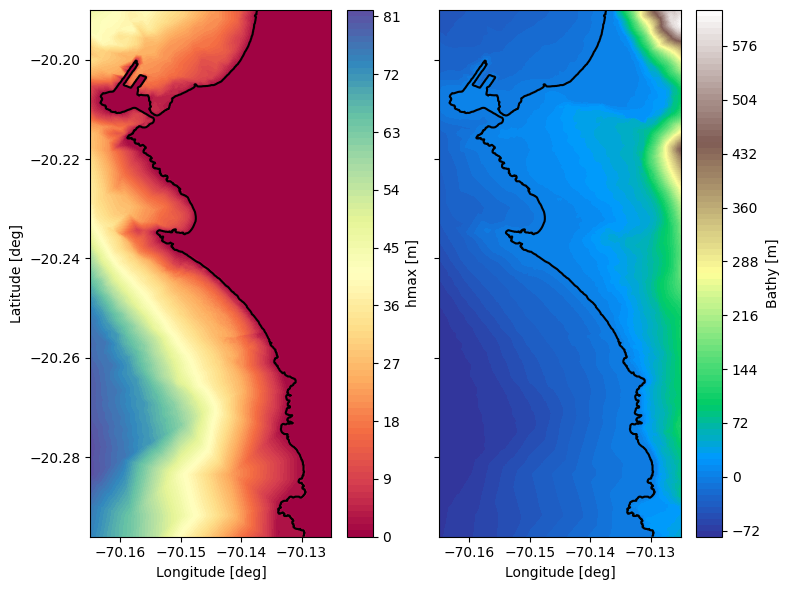

In [53]:
# Extract bounds
min_lon, max_lon, min_lat, max_lat = extent

grid_x, grid_y = hmax[0, :, :].shape
# Create the mesh grid for longitude and latitude
lon = np.linspace(min_lon, max_lon, grid_y)  # Longitude axis
lat = np.linspace(min_lat, max_lat, grid_x)  # Latitude axis
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)

# Plot 1: hmax with z=0 contour
contour1 = axes[0].contourf(
    lon_mesh, lat_mesh, np.flipud(hmax[0, :, :]),  # Flip the data vertically
    cmap='Spectral',  # Colormap
    levels=100        # Number of contour levels
)
axes[0].contour(
    lon_mesh, lat_mesh, np.flipud(bathy),  # Flip DEM vertically to match orientation
    levels=[0],  # Contour at z=0
    colors='black',  # Color of the contour line
    linewidths=1.5   # Thickness of the contour line
)
cbar1 = fig.colorbar(contour1, ax=axes[0])
cbar1.set_label('hmax [m]')
axes[0].set_xlabel('Longitude [deg]')
axes[0].set_ylabel('Latitude [deg]')

# Plot 2: DEM as contourf
contour2 = axes[1].contourf(
    lon_mesh, lat_mesh, np.flipud(bathy),  # Flip DEM vertically
    cmap='terrain',  # Colormap for elevation
    levels=100        # Number of contour levels
)
axes[1].contour(
    lon_mesh, lat_mesh, np.flipud(bathy),  # Flip DEM vertically to match orientation
    levels=[0],  # Contour at z=0
    colors='black',  # Color of the contour line
    linewidths=1.5   # Thickness of the contour line
)
cbar2 = fig.colorbar(contour2, ax=axes[1])
cbar2.set_label('Bathy [m]')
axes[1].set_xlabel('Longitude [deg]')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### CREATE DATASET

In [54]:
ds = xr.Dataset(
    {
        "bathy": (["lat", "lon"], bathy.astype("float32")),  # Bathy
    },
    coords={
        "lat": (["lat"], lat),  # Lat coordinate
        "lon": (["lon"], lon),  # Lon coordinate
    },
)
ds.to_netcdf(f'./{city}/bathymetry.nc')

In [55]:
for key, hmax_tensor in hDict.items():
    key = key.split('.')[0]
    ds = xr.Dataset(
        {
            'hmax': (["simulation", "lat", "lon"], hmax_tensor.astype("float32")),
        },
        coords={
            "lat": (["lat"], lat),
            "lon": (["lon"], lon),
            "simulation": (["simulation"], np.arange(hmax_tensor.shape[0])),
        },
    )
    encoding = {
    var: {"zlib": True, "complevel": 4, "dtype": "float32"} for var in ds.data_vars}
    output_file = f"./{city}/{key}.nc"
    ds.to_netcdf(output_file, encoding=encoding)
    
    print(f"{output_file} was created!")

./Iquique/hmax_map_1001.nc was created!
./Iquique/hmax_map_1003.nc was created!
./Iquique/hmax_map_1002.nc was created!
./Iquique/hmax_map_1006.nc was created!
./Iquique/hmax_map_1005.nc was created!
./Iquique/hmax_map_1004.nc was created!
